In [26]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
import urllib
import seaborn as sns
import random
import seaborn as sns
sns.set()

In [27]:
# Lectura de los datos
loc=r"winequality-red.csv"
data= pd.read_csv(loc,sep=";",)
names=list(data.columns.values)
label=list(data["quality"])
xlist=(data.drop("quality",1))
xlist=[xlist.iloc[i] for i in range(len(xlist))]

In [28]:
nrows = len(xlist)
ncols = len(xlist[0])

# Tomando un conjunto fijo de prueba del 30%
random.seed()
nSample = int(nrows*0.3)
idxTest = random.sample(range(nrows),nSample)
idxTest.sort()
idxTrain = [idx for idx in range(nrows) if not (idx in idxTest)]

xTrain = [xlist[r] for r in idxTrain]
xTest = [xlist[r] for r in idxTest]
yTrain = [label[r] for r in idxTrain]
yTest = [label[r] for r in idxTest]

Mínimo MSE
0.39493937204875657


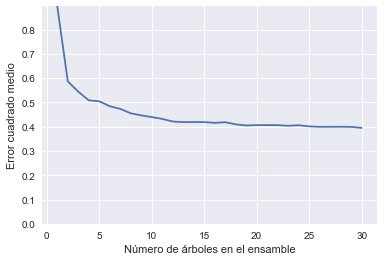

In [29]:
numTreeMax = 30
treeDepth = 12
nAttr = 4

modelList = []
indexList = []
predList = []
nTrainRows = len(yTrain)

for iTrees in range(numTreeMax):
    modelList.append(DecisionTreeRegressor(max_depth=treeDepth))
    
    # Tomar una muestra de atributos
    idxAttr = random.sample(range(ncols),nAttr)
    idxAttr.sort()
    indexList.append(idxAttr)
    
    # tomar muestras aleatorias
    idxRows = []
    for i in range(int(0.5 * nTrainRows)):
        idxRows.append(random.choice(range(len(xTrain))))
    idxRows.sort()
    
    xRfTrain = []
    yRfTrain = []
    
    for i in range(len(idxRows)):
        temp = [xTrain[idxRows[i]][j] for j in idxAttr]
        xRfTrain.append(temp)
        yRfTrain.append(yTrain[idxRows[i]])
        
    modelList[-1].fit(xRfTrain, yRfTrain)
    
    # Restringir xTest a los atributos seleccionados para entrenamiento
    xRfTest = []
    for xx in xTest:
        temp = [xx[i] for i in idxAttr]
        xRfTest.append(temp)
    latestOutSamplePrediction = modelList[-1].predict(xRfTest)
    predList.append(latestOutSamplePrediction)
    
# Construcción de los m modelos
mse = []
allPredictions = []
for iModels in range(len(modelList)):
    prediction = []
    for iPred in range(len(xTest)):
        prediction.append(sum([predList[i][iPred] for i in range(iModels + 1)])/(iModels + 1))
        
    allPredictions.append(prediction)
    errors = [(yTest[i] - prediction[i]) for i in range(len(yTest))]
    mse.append(sum([e * e for e in errors])/len(yTest))
    
nModels = [i + 1 for i in range(len(modelList))]
plt.plot(nModels,mse)
plt.axis("tight")
plt.xlabel("Número de árboles en el ensamble")
plt.ylabel("Error cuadrado medio")
plt.ylim((0.0,max(mse)))

print("Mínimo MSE")
print(min(mse))